# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. What's the difference between a ***log likelihood*** and ***log posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***log of the marginal likelihood constant***. [Or, another way to start thinking about this is to instead as the question: What's the difference between a ***likelihood*** and ***posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***marginal likelihood constant***.]

<!-- posterior proporitional to joint... --> 


1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     


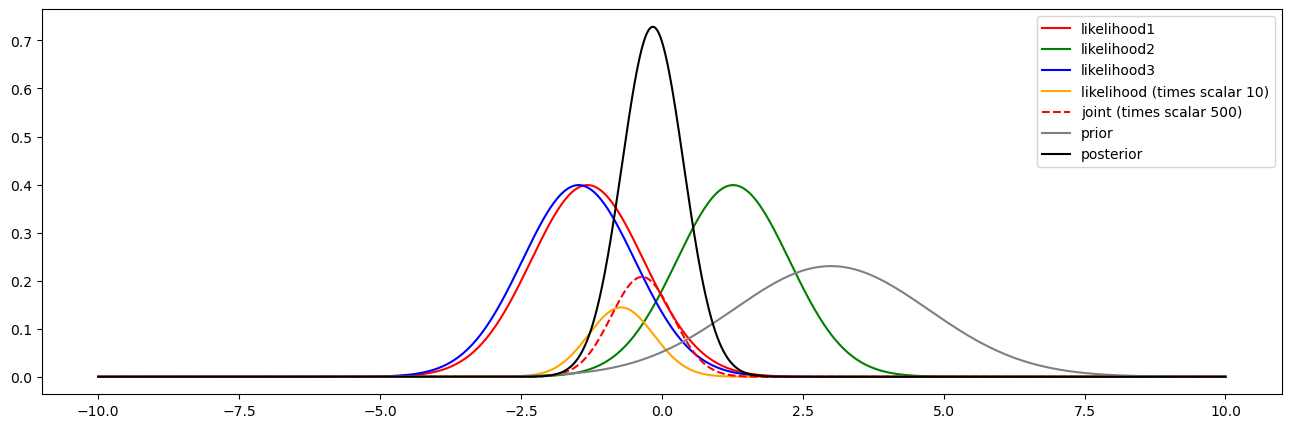

In [142]:
import numpy as np; 
from scipy import stats; 
import matplotlib.pyplot as plt


#Set up parameters(WE HAVE THE SAME SEETING AS THE LECTURE NOTEBOOK)
theta_0,tau =3,1/3; 
parameter_domain = np.linspace(-10,10,1001); 
np.random.seed(369)

#Collecting data point
x1 = stats.norm(loc=0,scale=1).rvs(1);
x2 = stats.norm(loc=0,scale=1).rvs(1);
x3 = stats.norm(loc=0,scale=1).rvs(1);
x = stats.norm(loc=0,scale=1).rvs(3);

#Calculate The Likelihood
likelihood1 = stats.norm.pdf(x1,loc=parameter_domain,scale = 1)
likelihood2 = stats.norm.pdf(x2,loc=parameter_domain,scale = 1)
likelihood3 = stats.norm.pdf(x3,loc=parameter_domain,scale = 1)
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known


#Setting up Prior and Posterior
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
posterior = stats.norm(loc=(tau*theta_0+(x1+x2+x3))/(tau+3), scale=1/(tau+3)**0.5).pdf(parameter_domain)  
joint = 500*likelihood*prior
#Calculate joint distribution



plt.figure(figsize=(16,5)); 
plt.plot(parameter_domain, likelihood1, color="Red", label="likelihood1"); 
plt.plot(parameter_domain, likelihood2, color="green", label="likelihood2");
plt.plot(parameter_domain, likelihood3, color="Blue", label="likelihood3");
plt.plot(parameter_domain, 10*likelihood, color = "orange", label="likelihood (times scalar "+str(10)+")"); 


plt.plot(parameter_domain, joint, linestyle="--", color="Red", label="joint (times scalar "+str(500)+")"); 
plt.plot(parameter_domain, prior, color = "grey", label="prior"); 
plt.plot(parameter_domain, posterior, color = "black", label="posterior"); 
plt.legend(); 

2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    



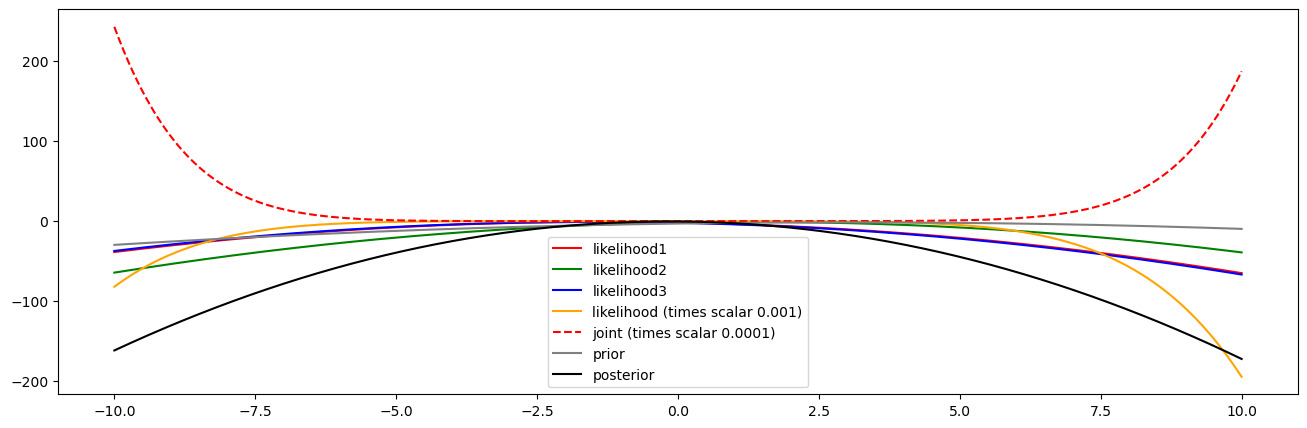

In [141]:
import numpy as np; 
from scipy import stats; 
import matplotlib.pyplot as plt


#Set up parameters(WE HAVE THE SAME SEETING AS THE LECTURE NOTEBOOK)
theta_0,tau =3,1/3; 
parameter_domain = np.linspace(-10,10,1001); 
np.random.seed(369)

#Collecting data point
x1 = stats.norm(loc=0,scale=1).rvs(1);
x2 = stats.norm(loc=0,scale=1).rvs(1);
x3 = stats.norm(loc=0,scale=1).rvs(1);
x = stats.norm(loc=0,scale=1).rvs(3);

#Calculate The Likelihood
likelihood1 = stats.norm.logpdf(x1,loc=parameter_domain,scale = 1)
likelihood2 = stats.norm.logpdf(x2,loc=parameter_domain,scale = 1)
likelihood3 = stats.norm.logpdf(x3,loc=parameter_domain,scale = 1)
likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known


#Setting up Prior and Posterior
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)
posterior = stats.norm(loc=(tau*theta_0+(x1+x2+x3))/(tau+3), scale=1/(tau+3)**0.5).logpdf(parameter_domain)  
joint = 0.0001*likelihood*prior


plt.figure(figsize=(16,5)); 
plt.plot(parameter_domain, likelihood1, color="Red", label="likelihood1"); 
plt.plot(parameter_domain, likelihood2, color="green", label="likelihood2");
plt.plot(parameter_domain, likelihood3, color="Blue", label="likelihood3");
plt.plot(parameter_domain, 0.001*likelihood, color = "orange", label="likelihood (times scalar "+str(0.001)+")"); 


plt.plot(parameter_domain, joint, linestyle="--", color="Red", label="joint (times scalar "+str(0.0001)+")"); 
plt.plot(parameter_domain, prior, color = "grey", label="prior"); 
plt.plot(parameter_domain, posterior, color = "black", label="posterior"); 
plt.legend(); 

3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?

    ***Answer:*** The Posterior distribution will follow normal distribution.

4. What's the difference between a ***log likelihood*** and ***log posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***log of the marginal likelihood constant***. [Or, another way to start thinking about this is to instead as the question: What's the difference between a ***likelihood*** and ***posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***marginal likelihood constant***.]

    ***Answere:*** We know that $p(\theta|x)\propto{}p(x|\theta)*p(\theta) \text{and since we say improper prior is used } p(\theta) \propto{} 1$, which leads us to $p(\theta|x)= p(x|\theta)/p(x)$ and we know that $p(x)$ is the marginal distribution, thus we say that the difference between likelihood and posterior when improper prior be used is marginal distribution. And then back to the original question, we take log on both side of the equation we have, $\log(p(\theta|x))=\log(p(x|\theta))-\log(p(x))$, simply, we can conclude that the difference of log likelihood and log posterior is log marginal distribution.